In [13]:
%cd /content/drive/MyDrive/varnita 

/content/drive/MyDrive/varnita


In [ ]:
!pip install biokit

In [ ]:
!pip install optuna

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import biokit
import optuna
from biokit.viz import corrplot
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
df_heart= pd.read_csv('heart.csv')

#**First 10 rows**


In [18]:
df_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


#**Last 10 rows**

In [19]:
df_heart.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


#**Column names**

In [20]:
df_heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

#**Unique values in columns with categorical data**

In [21]:
df_heart_cat= df_heart.drop(['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease'],axis=1)
for x in df_heart_cat.columns:
      print(x ,':', (df_heart_cat[x].unique()))

Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']


#**Number of unique values in each column**

In [22]:
for x in df_heart.columns:
      print(x ,':', len(df_heart[x].unique()))

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


#**Count of each categorical unique value**

In [23]:
for x in df_heart_cat.columns:
    print(df_heart_cat[x].value_counts().sort_values(ascending=False))

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


#**Information about dataframe**

In [24]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#**Number of missing values in data**

In [25]:
df_heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#**Some basic statistics about the data**

In [26]:
stat=df_heart.describe()
stat.loc['Skewness'] = df_heart.skew()
stat

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000
Skewness,-0.195933,0.179839,-0.610086,1.264484,-0.144359,1.022872,-0.215086


#**Number of duplicates in the data**

In [27]:
df_heart.duplicated().sum()

0

#**Distribution of columns**


> *Histograms*

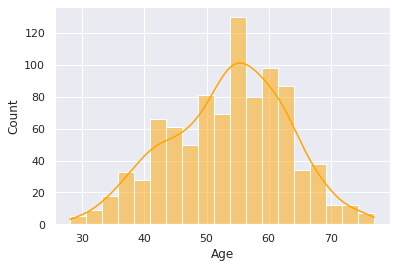

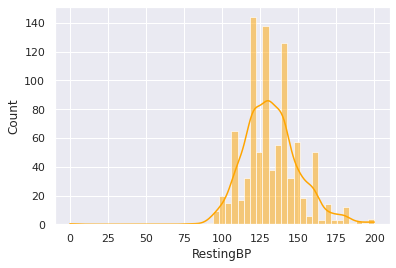

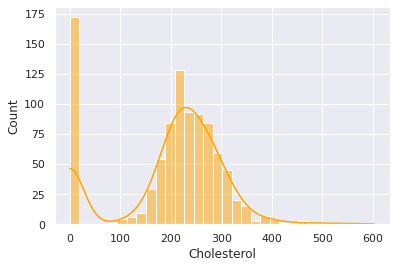

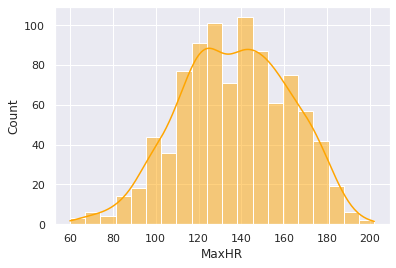

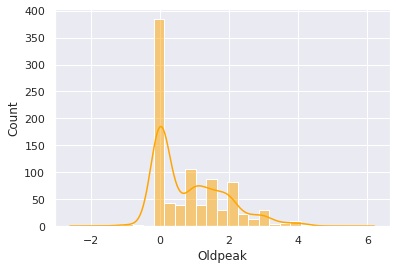

In [28]:
df_heart_num = df_heart.drop(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope','HeartDisease'], axis=1)
for x in df_heart_num.columns:
    sns.set_theme(style='darkgrid', palette='dark')
    sns.histplot(df_heart_num[x],kde=True,color='orange')
    plt.show()

>*Violin plots*


*   Distribution of numerical  for the presence and absence of heart disease
*   Distribution of categorical  for the presence and absence of heart disease




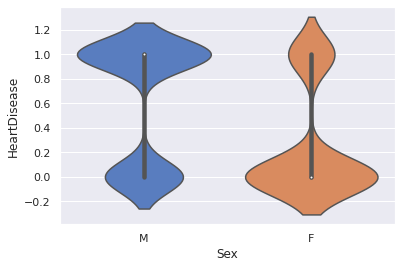

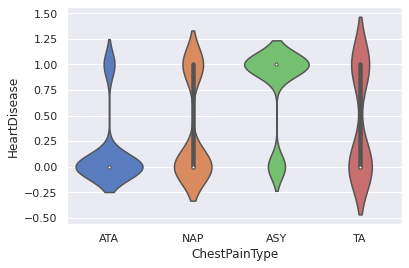

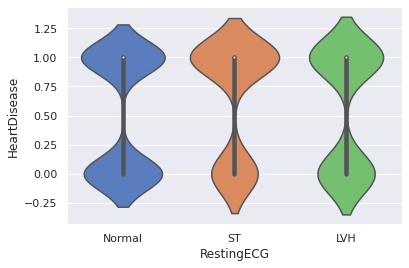

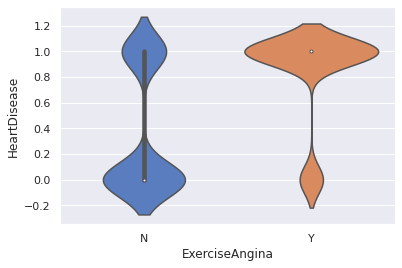

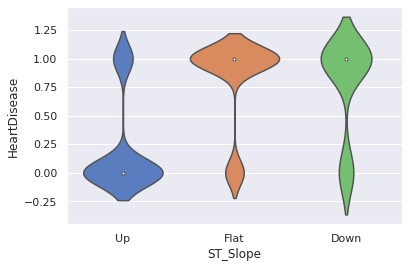

In [29]:
for x in df_heart_cat.columns:
    sns.violinplot(x=df_heart_cat[x],y=df_heart["HeartDisease"],palette="muted")
    plt.show()

>*Countplot for categorical data with presence or absence of heart disease*

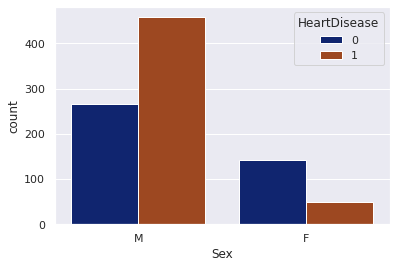

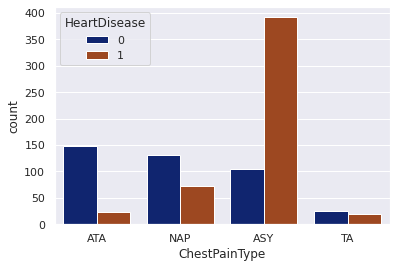

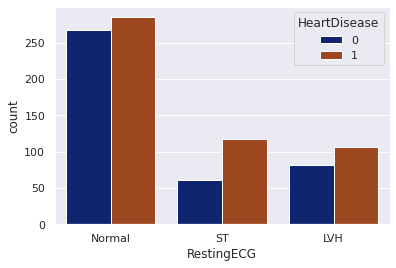

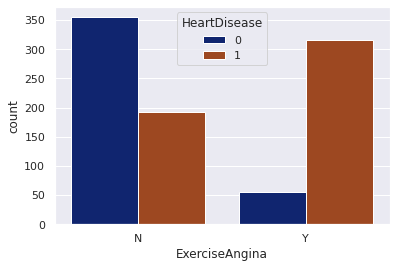

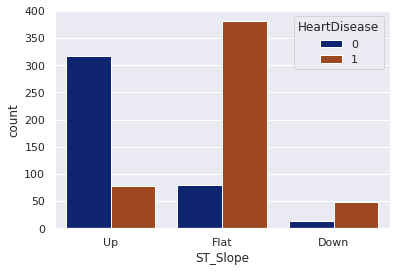

In [30]:
for x in df_heart_cat.columns:
    sns.countplot(data= df_heart_cat,x=df_heart_cat[x],hue=df_heart['HeartDisease'],palette='dark')
    plt.show()

>*Boxplot*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



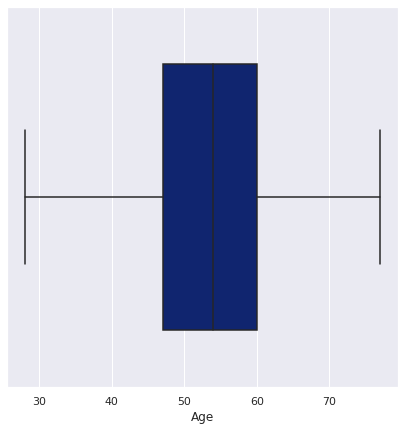

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



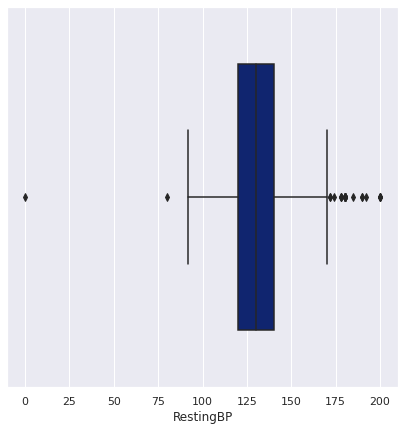

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



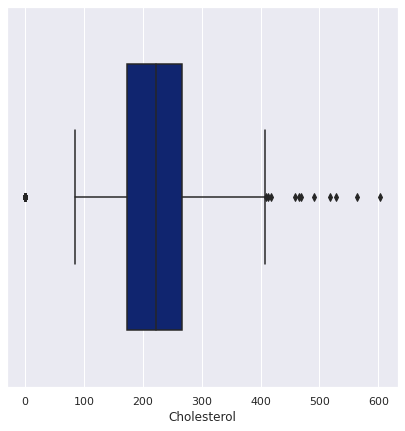

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



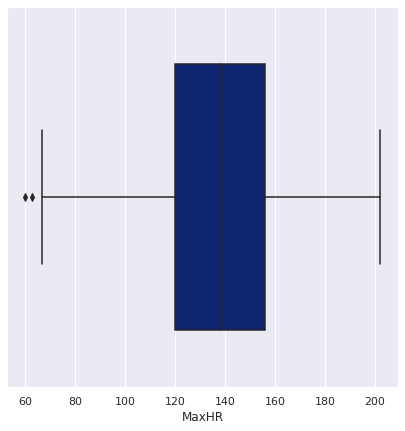

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



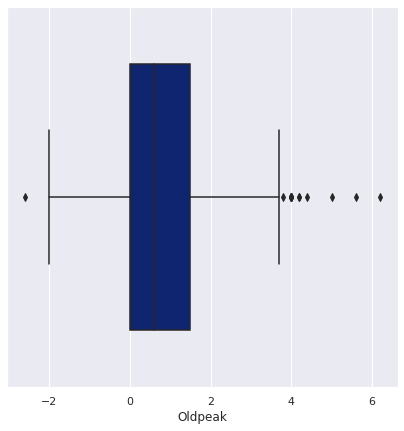

In [31]:
for x in df_heart_num.columns:
   fig=plt.figure(figsize=(7,7))
   sns.boxplot(df_heart_num[x],width=0.7)
   plt.show(fig)

#**Correlation between numerical data**

In [32]:
df_heart.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


#**Maps for correlation**

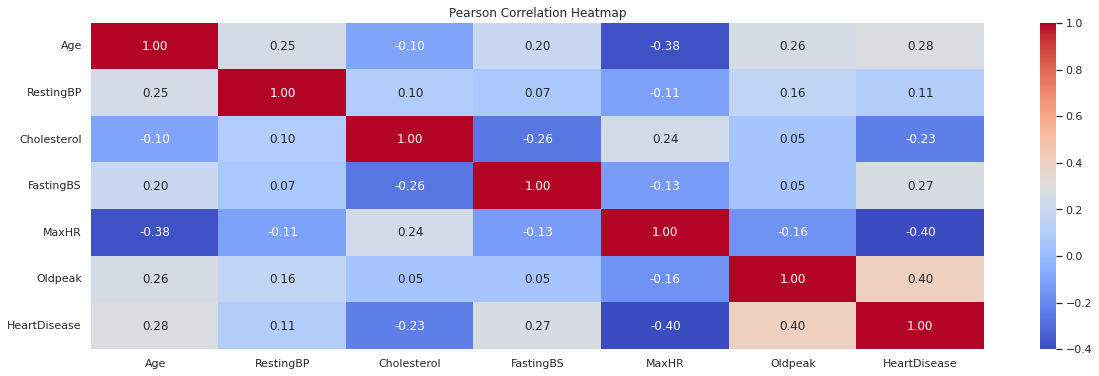

In [33]:
corr = df_heart.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

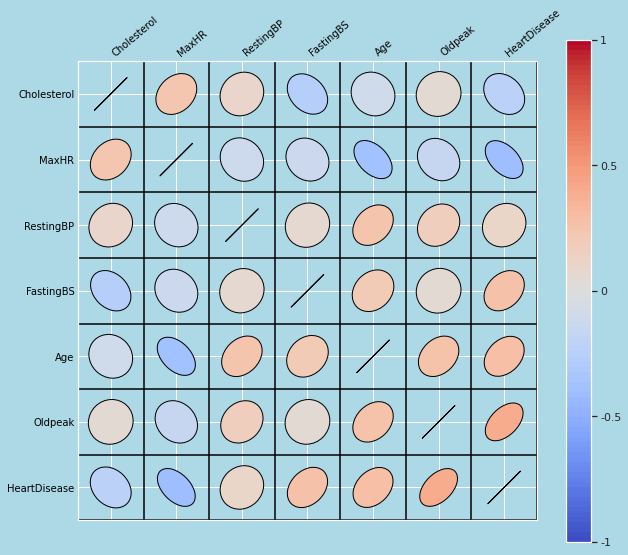

In [34]:
fig = plt.figure(figsize=(10,10))
c = corrplot.Corrplot(corr)
c.plot(fig=fig,method='ellipse', shrink=.7 ,rotation=40,cmap="coolwarm",facecolor="lightblue",grid="black")

#**Outlier treatment**

In [35]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Q1 = df_heart.quantile(.25)
Q3 = df_heart.quantile(.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
new_df_heart = df_heart[~((df_heart[num_cols] < (lower)) | (df_heart[num_cols] > (upper))).any(axis=1)]

In [36]:
print(f'Before treating outliers {df_heart.shape} || After treating outliers {new_df_heart.shape}')


Before treating outliers (918, 12) || After treating outliers (702, 12)


#**Distribution after outlier treatment**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



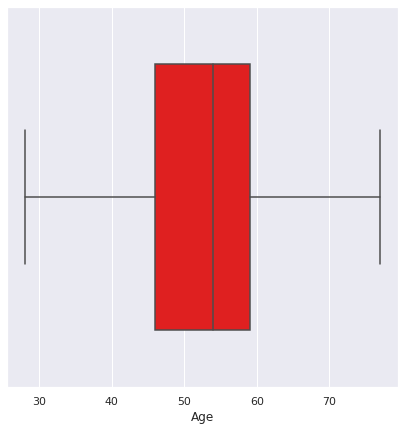

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



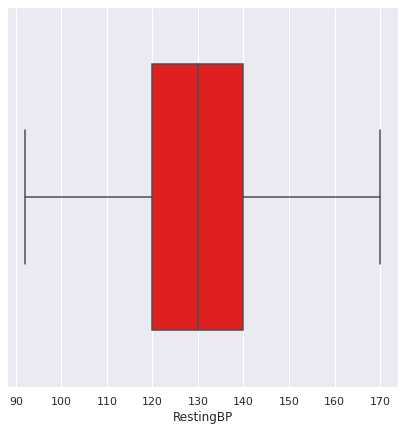

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



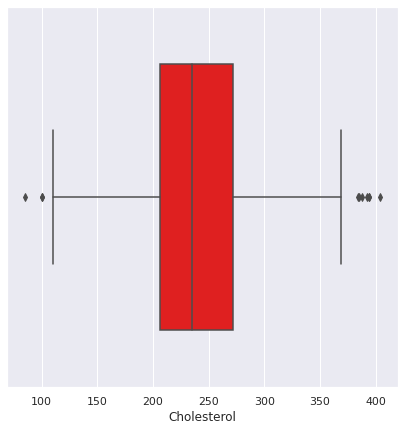

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



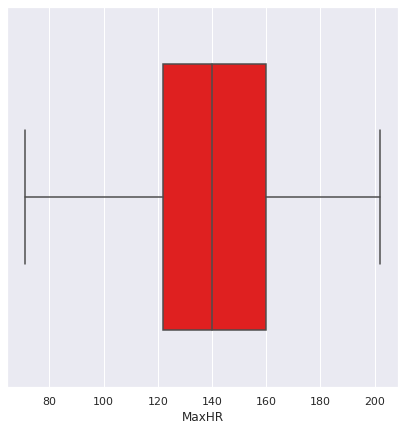

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



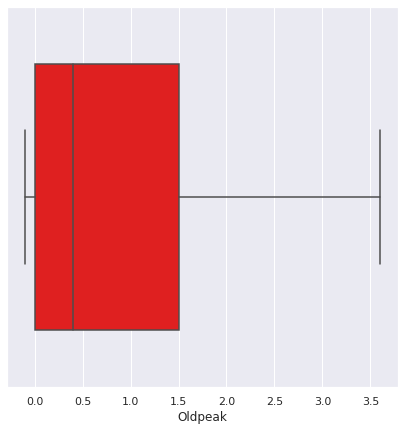

In [37]:
new_df_heart2=new_df_heart[num_cols]
for x in new_df_heart2.columns:
   fig=plt.figure(figsize=(7,7))
   sns.boxplot(new_df_heart2[x],width=0.7,color="red")
   plt.show(fig)

#**One hot encoding**

In [38]:
df_heart_enc=pd.get_dummies(new_df_heart, columns=['ChestPainType','RestingECG','ST_Slope','Sex','ExerciseAngina'])
df_heart_enc

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
3,48,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1
916,57,130,236,0,174,0.0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0


#**Correlation between new data**

In [39]:
df_heart_enc.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
Age,1.000000,0.270860,0.069529,0.238212,-0.402700,0.283476,0.305000,0.188593,-0.228281,-0.030705,0.063199,0.166706,-0.228302,0.111058,0.114599,0.224943,-0.272606,-0.064238,0.064238,-0.242473,0.242473
RestingBP,0.270860,1.000000,0.089587,0.174080,-0.128768,0.191743,0.171118,0.070593,-0.090378,-0.041114,0.087285,0.011576,-0.072693,0.082912,0.065229,0.097779,-0.124933,-0.074874,0.074874,-0.153079,0.153079
Cholesterol,0.069529,0.089587,1.000000,0.028912,-0.002240,0.071706,0.098115,0.084632,-0.000101,-0.078444,-0.039864,0.095777,-0.064524,-0.024362,-0.043783,0.082725,-0.064383,0.092209,-0.092209,-0.109150,0.109150
FastingBS,0.238212,0.174080,0.028912,1.000000,-0.112441,0.067966,0.164390,0.052449,-0.091916,-0.004300,0.061827,0.065631,-0.169826,0.149491,0.070430,0.116704,-0.146014,-0.102131,0.102131,-0.106055,0.106055
MaxHR,-0.402700,-0.128768,-0.002240,-0.112441,1.000000,-0.280452,-0.395452,-0.376791,0.251371,0.151806,0.081890,0.075525,0.048992,-0.151344,-0.055995,-0.364571,0.387662,0.153691,-0.153691,0.419455,-0.419455
Oldpeak,0.283476,0.191743,0.071706,0.067966,-0.280452,1.000000,0.502095,0.340575,-0.304317,-0.116223,0.028495,0.083718,-0.096597,0.031886,0.295603,0.448447,-0.571496,-0.151062,0.151062,-0.483531,0.483531
HeartDisease,0.305000,0.171118,0.098115,0.164390,-0.395452,0.502095,1.000000,0.523590,-0.381880,-0.212881,-0.050581,0.071492,-0.130516,0.090769,0.112109,0.602515,-0.648845,-0.306517,0.306517,-0.550326,0.550326
ChestPainType_ASY,0.188593,0.070593,0.084632,0.052449,-0.376791,0.340575,0.523590,1.000000,-0.526557,-0.532948,-0.235050,0.067797,-0.107036,0.063938,0.075181,0.360833,-0.391935,-0.189513,0.189513,-0.480657,0.480657
ChestPainType_ATA,-0.228281,-0.090378,-0.000101,-0.091916,0.251371,-0.304317,-0.381880,-0.526557,1.000000,-0.298786,-0.131776,-0.124987,0.130499,-0.029460,-0.086179,-0.324226,0.359949,0.140947,-0.140947,0.315304,-0.315304
ChestPainType_NAP,-0.030705,-0.041114,-0.078444,-0.004300,0.151806,-0.116223,-0.212881,-0.532948,-0.298786,1.000000,-0.133375,0.013431,0.027658,-0.051979,-0.023133,-0.095200,0.104783,0.086912,-0.086912,0.188659,-0.188659


#**Drop a categorical column to avoid multicollinearity**

In [42]:
df_heart_enc2=df_heart_enc.drop(["ChestPainType_ASY","RestingECG_Normal","ST_Slope_Up","Sex_F","ExerciseAngina_Y"], axis=1)
df_heart_enc2.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'Sex_M', 'ExerciseAngina_N'],
      dtype='object')

#**Scaling of data**

In [43]:
scaler = preprocessing.MinMaxScaler()
df_heart_enc2[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]=scaler.fit_transform(df_heart_enc2[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])
df_heart_enc2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,Sex_M,ExerciseAngina_N
0,0.244898,0.615385,0.639498,0,0.770992,0.027027,0,1,0,0,0,0,0,0,1,1
1,0.428571,0.871795,0.297806,0,0.648855,0.297297,1,0,1,0,0,0,0,1,0,1
2,0.183673,0.487179,0.620690,0,0.206107,0.027027,0,1,0,0,0,1,0,0,1,1
3,0.408163,0.589744,0.404389,0,0.282443,0.432432,1,0,0,0,0,0,0,1,0,0
4,0.530612,0.743590,0.344828,0,0.389313,0.027027,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.230769,0.561129,0,0.465649,0.351351,1,0,0,1,0,0,0,1,1,1
914,0.816327,0.666667,0.338558,1,0.534351,0.945946,1,0,0,0,0,0,0,1,1,1
915,0.591837,0.487179,0.144201,0,0.335878,0.351351,1,0,0,0,0,0,0,1,1,0
916,0.591837,0.487179,0.473354,0,0.786260,0.027027,1,1,0,0,1,0,0,1,0,1


#**Maps for correlation after scaling**

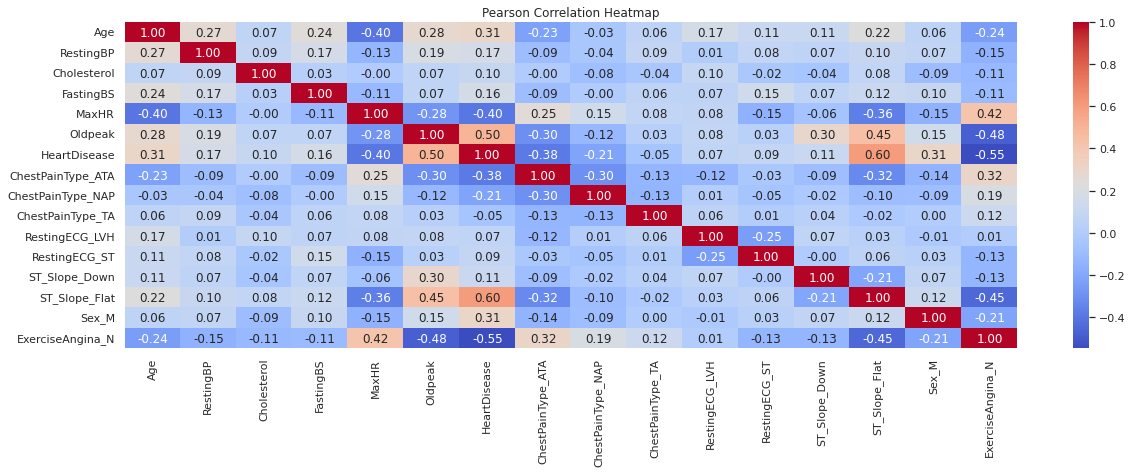

In [52]:
corr2 = df_heart_enc2.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

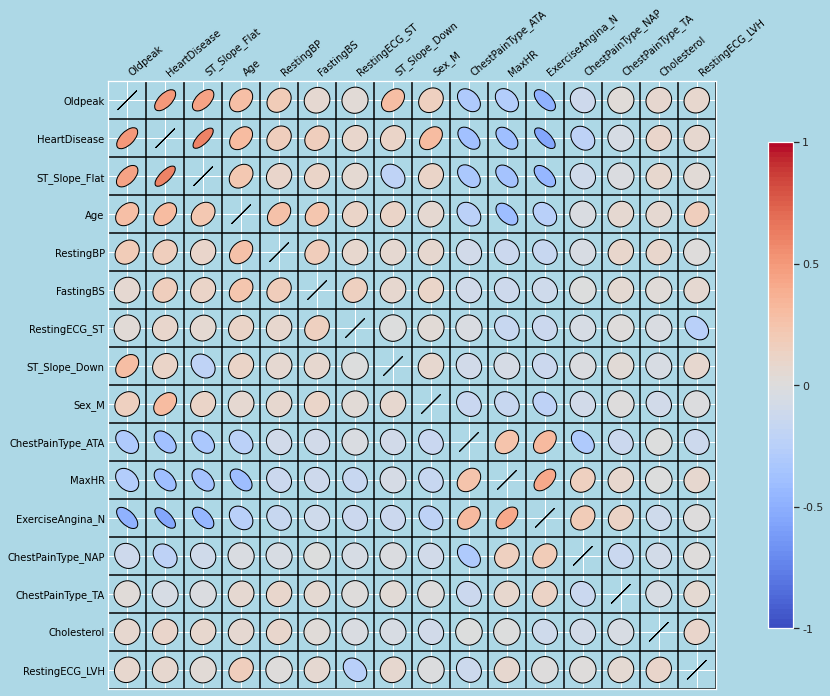

In [53]:
fig = plt.figure(figsize=(15,10))
c = corrplot.Corrplot(corr2)
c.plot(fig=fig,method='ellipse', shrink=.7 ,rotation=40,cmap="coolwarm",facecolor="lightblue",grid="black")

#**Min,Max and Mean of each column**

In [44]:
for x in df_heart_enc2.columns:
    print("Max:",str(x),"=",df_heart_enc2[x].max())
    print("Min:",str(x),"=",df_heart_enc2[x].min())
    print("Mean:",str(x),"=",df_heart_enc2[x].mean())
    print("\n")

Max: Age = 1.0
Min: Age = 0.0
Mean: Age = 0.5045351473922898


Max: RestingBP = 0.9999999999999998
Min: RestingBP = 0.0
Mean: RestingBP = 0.5071407699612832


Max: Cholesterol = 1.0
Min: Cholesterol = 0.0
Mean: Cholesterol = 0.48498245049969163


Max: FastingBS = 1
Min: FastingBS = 0
Mean: FastingBS = 0.1623931623931624


Max: MaxHR = 0.9999999999999999
Min: MaxHR = 0.0
Mean: MaxHR = 0.530914943128684


Max: Oldpeak = 0.9999999999999998
Min: Oldpeak = 0.0
Mean: Oldpeak = 0.2515977515977525


Max: HeartDisease = 1
Min: HeartDisease = 0
Mean: HeartDisease = 0.46296296296296297


Max: ChestPainType_ATA = 1
Min: ChestPainType_ATA = 0
Mean: ChestPainType_ATA = 0.22792022792022792


Max: ChestPainType_NAP = 1
Min: ChestPainType_NAP = 0
Mean: ChestPainType_NAP = 0.23219373219373218


Max: ChestPainType_TA = 1
Min: ChestPainType_TA = 0
Mean: ChestPainType_TA = 0.05555555555555555


Max: RestingECG_LVH = 1
Min: RestingECG_LVH = 0
Mean: RestingECG_LVH = 0.23504273504273504


Max: RestingECG_ST =

#**Modelling**

In [45]:
X=df_heart_enc2.drop(["HeartDisease"],axis=1)
Y=df_heart_enc2["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

#**SVM**

In [ ]:
modelsvm=svm.SVC()
modelsvm.fit(X_train, y_train)

SVC()

Accuracy: 0.8483412322274881
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       107
           1       0.83      0.88      0.85       104

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211



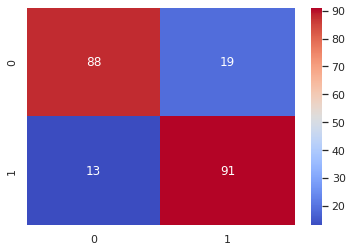

In [ ]:
pred=modelsvm.predict(X_test)
con_mat=confusion_matrix(y_test, pred)
sns.heatmap(con_mat,cmap = 'coolwarm',annot=True)
accuracy=accuracy_score(y_test, pred)
print('Accuracy:' ,accuracy)
print(classification_report(y_test, pred))

In [ ]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)
    params = {
        'kernel':trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid']),
        'C': trial.suggest_float("C",0.1,3.0,log=True),
        'gamma': trial.suggest_categorical('gamma',['auto','scale']),
        'degree': trial.suggest_int("degree",1,3,log=True),
    }
    modelsvm2 =svm.SVC(**params)
    modelsvm2.fit(X_train, y_train)
    preds = modelsvm2.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy
study = optuna.create_study(direction="maximize")
print(f"Sampler is {study.sampler.__class__.__name__}")
study.optimize(objective, n_trials=50, timeout=100)

In [ ]:
trialsvm2 = study.best_trial.params
modelsvm2=svm.SVC(**trialsvm2)
modelsvm2.fit(X_train, y_train)

SVC(C=0.11093170969121725, degree=1, gamma='auto')

Accuracy: 0.8578199052132701
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.86      0.86      0.86       104

    accuracy                           0.86       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.86      0.86      0.86       211



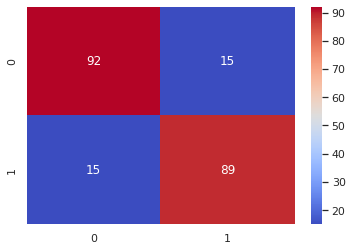

In [ ]:
pred=modelsvm2.predict(X_test)
con_mat=confusion_matrix(y_test, pred)
sns.heatmap(con_mat,cmap = 'coolwarm',annot=True)
accuracy=accuracy_score(y_test, pred)
print('Accuracy:' ,accuracy)
print(classification_report(y_test, pred))

#**Random Forest**

In [ ]:
modelrf=RandomForestClassifier(n_estimators=50)
modelrf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

Accuracy: 0.8578199052132701
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       107
           1       0.84      0.88      0.86       104

    accuracy                           0.86       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.86      0.86      0.86       211



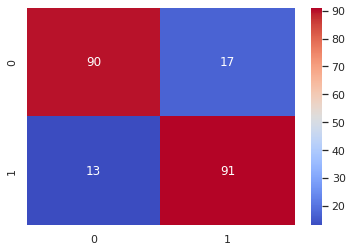

In [ ]:
pred=modelrf.predict(X_test)
con_mat=confusion_matrix(y_test, pred)
sns.heatmap(con_mat,cmap = 'coolwarm',annot=True)
accuracy=accuracy_score(y_test, pred)
print('Accuracy:' ,accuracy)
print(classification_report(y_test, pred))

In [ ]:
def objective(trial):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)
  params={
    'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy']),
    'bootstrap' : trial.suggest_categorical('bootstrap',['True','False']),
    'max_depth' : trial.suggest_int('max_depth', 1, 1000),
    'max_features' : trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
    'max_leaf_nodes' : trial.suggest_int('max_leaf_nodes', 1, 10000),
    'n_estimators' :  trial.suggest_int('n_estimators', 10, 1000)
    }
  modelrf2 =RandomForestClassifier(**params)
  modelrf2.fit(X_train, y_train)
  preds = modelrf2.predict(X_test)
  accuracy = accuracy_score(y_test, preds)
  return accuracy
study = optuna.create_study(direction="maximize")
print(f"Sampler is {study.sampler.__class__.__name__}")
study.optimize(objective, n_trials=50, timeout=100)  
   

In [ ]:
trialrf2 = study.best_trial.params
modelrf2=RandomForestClassifier(**trialrf2)
modelrf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap='True', criterion='entropy', max_depth=706,
                       max_features='log2', max_leaf_nodes=5490,
                       n_estimators=130)

Accuracy: 0.8530805687203792
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       107
           1       0.84      0.87      0.85       104

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211



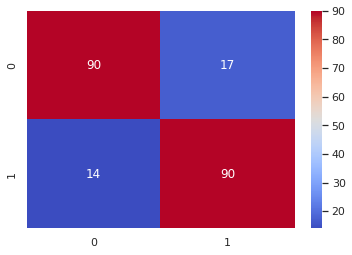

In [ ]:
pred=modelrf2.predict(X_test)
con_mat=confusion_matrix(y_test, pred)
sns.heatmap(con_mat,cmap = 'coolwarm',annot=True)
accuracy=accuracy_score(y_test, pred)
print('Accuracy:' ,accuracy)
print(classification_report(y_test, pred))

#**Naive Bayes**

In [ ]:
modelnb=GaussianNB(var_smoothing = 0.2)
modelnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.2)

Accuracy: 0.8625592417061612
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.87      0.85      0.86       104

    accuracy                           0.86       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.86      0.86      0.86       211



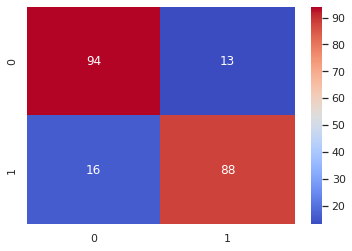

In [ ]:
pred=modelnb.predict(X_test)
con_mat=confusion_matrix(y_test, pred)
sns.heatmap(con_mat,cmap = 'coolwarm',annot=True)
accuracy=accuracy_score(y_test, pred)
print('Accuracy:' ,accuracy)
print(classification_report(y_test, pred))

In [ ]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)
    params = {
        'var_smoothing': trial.suggest_float('var_smoothing', 0.05, 0.9),
    }
    modelnb2 =GaussianNB(**params)
    modelnb2.fit(X_train, y_train)
    preds = modelnb2.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy
study = optuna.create_study(direction="maximize")
print(f"Sampler is {study.sampler.__class__.__name__}")
study.optimize(objective, n_trials=50, timeout=100)

In [ ]:
trialnb = study.best_trial.params
modelnb2=GaussianNB(**trialnb)
modelnb2.fit(X_train, y_train)

GaussianNB(var_smoothing=0.6243297029490291)

Accuracy: 0.8720379146919431
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       107
           1       0.87      0.87      0.87       104

    accuracy                           0.87       211
   macro avg       0.87      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211



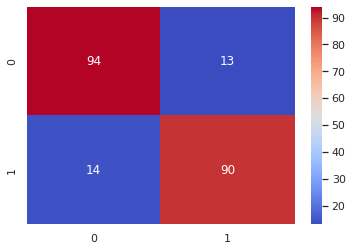

In [ ]:
pred=modelnb2.predict(X_test)
con_mat=confusion_matrix(y_test, pred)
sns.heatmap(con_mat,cmap = 'coolwarm',annot=True)
accuracy=accuracy_score(y_test, pred)
print('Accuracy:' ,accuracy)
print(classification_report(y_test, pred))

#**xgboost**

In [ ]:
modelx=XGBClassifier(learning_rate = 0.1, n_estimators = 50)
modelx.fit(X_train, y_train)

XGBClassifier(n_estimators=50)

Accuracy: 0.8578199052132701
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       107
           1       0.84      0.88      0.86       104

    accuracy                           0.86       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.86      0.86      0.86       211



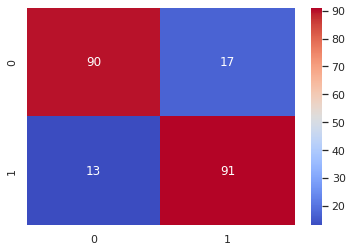

In [ ]:
pred=modelx.predict(X_test)
con_mat=confusion_matrix(y_test, pred)
sns.heatmap(con_mat,cmap = 'coolwarm',annot=True)
accuracy=accuracy_score(y_test, pred)
print('Accuracy:' ,accuracy)
print(classification_report(y_test, pred))

In [ ]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 600),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.001, .1),
        'subsample': trial.suggest_uniform('subsample', 0.25, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.20, 1),
        'gamma': trial.suggest_int('gamma', 0, 10),
        'objective': 'binary:logistic'
    }
    modelx2 =XGBClassifier(**params)
    modelx2.fit(X_train, y_train, verbose=0)
    preds = modelx2.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy
study = optuna.create_study(direction="maximize")
print(f"Sampler is {study.sampler.__class__.__name__}")
study.optimize(objective, n_trials=50, timeout=100)

[I 2021-12-14 14:52:16,753] A new study created in memory with name: no-name-edeb02b0-1bed-43bd-afd8-ef27b24cdaad
[I 2021-12-14 14:52:16,952] Trial 0 finished with value: 0.8578199052132701 and parameters: {'n_estimators': 253, 'max_depth': 18, 'learning_rate': 0.060317364764283656, 'subsample': 0.6010365293266501, 'colsample_bytree': 0.6381324077958483, 'gamma': 6}. Best is trial 0 with value: 0.8578199052132701.


Sampler is TPESampler


[I 2021-12-14 14:52:17,025] Trial 1 finished with value: 0.8483412322274881 and parameters: {'n_estimators': 69, 'max_depth': 11, 'learning_rate': 0.03497958166182332, 'subsample': 0.7071493635092226, 'colsample_bytree': 0.7408971601949952, 'gamma': 4}. Best is trial 0 with value: 0.8578199052132701.
[I 2021-12-14 14:52:17,157] Trial 2 finished with value: 0.8388625592417062 and parameters: {'n_estimators': 192, 'max_depth': 18, 'learning_rate': 0.07346576515015034, 'subsample': 0.8694484384802157, 'colsample_bytree': 0.38830504507843905, 'gamma': 9}. Best is trial 0 with value: 0.8578199052132701.
[I 2021-12-14 14:52:17,389] Trial 3 finished with value: 0.8483412322274881 and parameters: {'n_estimators': 428, 'max_depth': 10, 'learning_rate': 0.05829849924798508, 'subsample': 0.4198410917002379, 'colsample_bytree': 0.43486488456881933, 'gamma': 6}. Best is trial 0 with value: 0.8578199052132701.
[I 2021-12-14 14:52:17,453] Trial 4 finished with value: 0.8199052132701422 and parameters

In [ ]:
trialx2 = study.best_trial.params
modelx2=XGBClassifier(**trialx2)
modelx2.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.49802688683127416, gamma=3,
              learning_rate=0.0903444954551967, max_depth=17, n_estimators=499,
              subsample=0.3850759241243033)

Accuracy: 0.8862559241706162
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       107
           1       0.87      0.90      0.89       104

    accuracy                           0.89       211
   macro avg       0.89      0.89      0.89       211
weighted avg       0.89      0.89      0.89       211



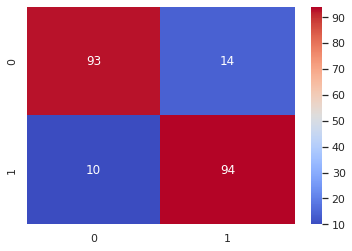

In [ ]:
pred=modelx2.predict(X_test)
con_mat=confusion_matrix(y_test, pred)
sns.heatmap(con_mat,cmap = 'coolwarm',annot=True)
accuracy=accuracy_score(y_test, pred)
print('Accuracy:' ,accuracy)
print(classification_report(y_test, pred))